In [2]:
import sys
import os
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [9]:
res = 100
MN = 30
x = np.linspace(0, 2*np.pi, res)
X, Y = np.meshgrid(x, x)
m = np.arange(1, MN+1)
mm, nn = np.meshgrid(m, m)
X = X.flatten()
Y = Y.flatten()
M = mm.flatten()
N = nn.flatten()
M.shape, X.shape

((900,), (10000,))

In [10]:
J = [(1 - m**2 - n**2) * np.sin(m * X) * np.cos(n * Y) for m, n in zip(M, N)]
Jp = [np.sin(m * X) * np.cos(n * Y) for m, n in zip(M, N)]
J = np.array(J).T
Jp = np.array(Jp).T

In [11]:
np.linalg.cond(J), np.linalg.cond(Jp)

(np.float64(1847.2884701835142), np.float64(1.267304464625857))

In [16]:
res = 100
x = np.linspace(0, 2 * np.pi, res)
X, Y = np.meshgrid(x, x)
X = X.flatten()
Y = Y.flatten()
condsJ = []
condsJp = []
res_range = np.arange(8, 40)
for i in res_range:
    MN = i
    m = np.arange(1, MN + 1)
    mm, nn = np.meshgrid(m, m)
    M = mm.flatten()
    N = nn.flatten()
    J = [(1 - m**2 - n**2) * np.sin(m * X) * np.cos(n * Y) for m, n in zip(M, N)]
    Jp = [np.sin(m * X) * np.cos(n * Y) for m, n in zip(M, N)]
    J = np.array(J).T
    Jp = np.array(Jp).T
    condsJ.append(np.linalg.cond(J))
    condsJp.append(np.linalg.cond(Jp))

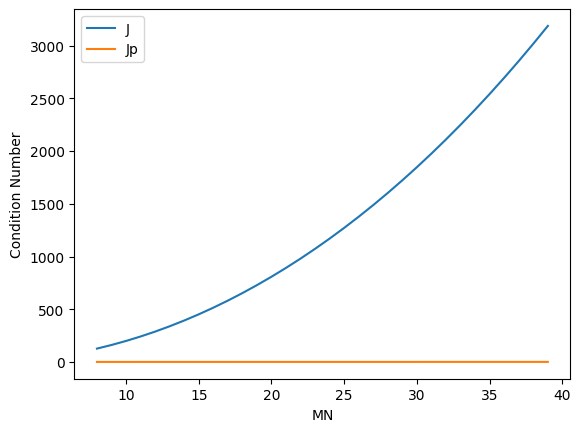

In [19]:
plt.plot(res_range, condsJ, label='J')
plt.plot(res_range, condsJp, label='Jp')
plt.xlabel('MN')
plt.ylabel('Condition Number')
plt.legend()